In [1]:
#Реализация считывания информации через CSV файл
import csv

data = []
with open('data.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';', quotechar='|')
    for row in spamreader:
        data.append(row)
        


In [6]:
#Отчет, содержащий информацию о каждом товаре, общую сумма выручки, наиболее продоваемый товаре, наиболее прибыльный товаре
def make_total_sum(data):
    total_sum = 0
    for row in data[1:]:
        total_sum += int(row[6])
    return total_sum

def find_most_selling_product(data):
    max_selling = 0
    product = ""
    for row in data[1:]:
        if int(row[4]) > max_selling:
            max_selling = int(row[4])
            product = row[2]
    return product

def find_most_profitable_product(data):
    max_profit = 0
    product = ""
    for row in data[1:]:
        if int(row[6]) > max_profit:
            max_profit = int(row[6])
            product = row[2]
    return product


def make_report(data):
    report = ""
    total_sum = make_total_sum(data)
    report += f"Общая сумма выручки магазина: {total_sum}\n"
    report += "----------\n"
    most_selling = find_most_selling_product(data)
    report += f"Наиболее продоваемый товар: {most_selling}\n"
    report += "----------\n"
    most_profitable = find_most_profitable_product(data)
    report += f"Наиболее прибыльный товар: {most_profitable}\n"
    report += "----------\n"
    report += "Отчёт по каждому товару :\n"
    for row in data[1:]:
        report += f"{row[2]}:\n\tВыручка с одного товара = {row[5]},\n\tКоличество проданных товаров = {row[4]},\n\tОбщая стоимость проданных товаров = {row[6]},\n\tДоля от общей выручки = {round(int(row[6])/total_sum*100, 1)} %\n"
    return report
print(make_report(data))

Общая сумма выручки магазина: 592000
----------
Наиболее продоваемый товар: Тамбурин
----------
Наиболее прибыльный товар: Пианино
----------
Отчёт по каждому товару :
Гитара:
	Выручка с одного товара = 15000,
	Количество проданных товаров = 3,
	Общая стоимость проданных товаров = 45000,
	Доля от общей выручки = 7.6 %
Барабаны:
	Выручка с одного товара = 20000,
	Количество проданных товаров = 2,
	Общая стоимость проданных товаров = 40000,
	Доля от общей выручки = 6.8 %
Саксофон:
	Выручка с одного товара = 30000,
	Количество проданных товаров = 1,
	Общая стоимость проданных товаров = 30000,
	Доля от общей выручки = 5.1 %
Пианино:
	Выручка с одного товара = 50000,
	Количество проданных товаров = 1,
	Общая стоимость проданных товаров = 50000,
	Доля от общей выручки = 8.4 %
Флейта:
	Выручка с одного товара = 7000,
	Количество проданных товаров = 5,
	Общая стоимость проданных товаров = 35000,
	Доля от общей выручки = 5.9 %
Укулеле:
	Выручка с одного товара = 5000,
	Количество проданных това

In [10]:
#Быстрая сортировка
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    selcetion = arr[len(arr) // 2][1]
    left = [x for x in arr if x[1] < selcetion]
    middle = [x for x in arr if x[1] == selcetion]
    right = [x for x in arr if x[1] > selcetion]
    return quicksort(left) + middle + quicksort(right)
print('Быстрая сортировка:\n',quicksort(data))

Быстрая сортировка:
 [['1', '01.05.2024', 'Гитара', 'Струнные', '3', '15000', '45000'], ['2', '02.05.2024', 'Барабаны', 'Ударные', '2', '20000', '40000'], ['3', '03.05.2024', 'Саксофон', 'Духовые', '1', '30000', '30000'], ['4', '04.05.2024', 'Пианино', 'Клавишные', '1', '50000', '50000'], ['5', '05.05.2024', 'Флейта', 'Духовые', '5', '7000', '35000'], ['6', '06.05.2024', 'Укулеле', 'Струнные', '4', '5000', '20000'], ['7', '07.05.2024', 'Тромбон', 'Духовые', '2', '15000', '30000'], ['8', '08.05.2024', 'Виолончель', 'Струнные', '1', '40000', '40000'], ['9', '09.05.2024', 'Баян', 'Клавишные', '3', '13000', '39000'], ['10', '10.05.2024', 'Губная гармошка', 'Духовые', '6', '2000', '12000'], ['11', '11.05.2024', 'Балалайка', 'Струнные', '2', '8000', '16000'], ['12', '12.05.2024', 'Аккордеон', 'Клавишные', '1', '25000', '25000'], ['13', '13.05.2024', 'Труба', 'Духовые', '3', '12000', '36000'], ['14', '14.05.2024', 'Скрипка', 'Струнные', '4', '10000', '40000'], ['15', '15.05.2024', 'Ксилофон',

In [13]:
# Хэш таблица 
class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None

class HashTable:
    def __init__(self):
        self.capacity = 5
        self.size = 0
        self.buckets = [None] * self.capacity
  
    def add(self, key, value):
        index = hash(key) % self.capacity
        node = self.buckets[index]
        
        while node:
            if node.key == key: 
                node.value = value
                return
            node = node.next
 
        new_node = Node(key, value)
        new_node.next = self.buckets[index]
        self.buckets[index] = new_node
        self.size += 1
        if self.size > 0.7 * self.capacity:
            self._rehash()
  
    def get(self, key):
        index = hash(key) % self.capacity
        node = self.buckets[index]
        while node:
            if node.key == key:
                return node.value
            node = node.next
        return None
  
    def remove(self, key):
        index = hash(key) % self.capacity
        node = self.buckets[index]
        prev = None
        while node:
            if node.key == key:
                if prev:
                    prev.next = node.next
                else:
                    self.buckets[index] = node.next
                self.size -= 1
                return
            prev = node
            node = node.next
  
    def _rehash(self):
        tmp = self.buckets
        self.capacity *= 2
        self.size = 0
        self.buckets = [None] * self.capacity
        for node in tmp:
            while node:
                self.add(node.key, node.value)
                node = node.next

hashtable = HashTable()
for i in range(20):
    hashtable.add(data[i+1][2],data[i+1][6])
print(hashtable.get('Гитара'))
print(hashtable.get('Труба'))
print(hashtable.get('Гармоника'))

45000
36000
16000


In [25]:
#Стек
class Stack:
    def __init__(self):
        self.items = []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        return self.items.pop()

    def peek(self):
        return self.items[-1]

    def is_empty(self):
        return len(self.items) == 0

stack = Stack()
elements = data
for i in elements:
    stack.push(i)
while not stack.is_empty():
    print(stack.pop())



['20', '20.05.2024', 'Гармоника', 'Духовые', '4', '4000', '16000']
['19', '19.05.2024', 'Кларнет', 'Духовые', '2', '15000', '30000']
['18', '18.05.2024', 'Мандолина', 'Струнные', '3', '8000', '24000']
['17', '17.05.2024', 'Тамбурин', 'Ударные', '7', '3000', '21000']
['16', '16.05.2024', 'Гармонь', 'Клавишные', '2', '9000', '18000']
['15', '15.05.2024', 'Ксилофон', 'Ударные', '5', '5000', '25000']
['14', '14.05.2024', 'Скрипка', 'Струнные', '4', '10000', '40000']
['13', '13.05.2024', 'Труба', 'Духовые', '3', '12000', '36000']
['12', '12.05.2024', 'Аккордеон', 'Клавишные', '1', '25000', '25000']
['11', '11.05.2024', 'Балалайка', 'Струнные', '2', '8000', '16000']
['10', '10.05.2024', 'Губная гармошка', 'Духовые', '6', '2000', '12000']
['9', '09.05.2024', 'Баян', 'Клавишные', '3', '13000', '39000']
['8', '08.05.2024', 'Виолончель', 'Струнные', '1', '40000', '40000']
['7', '07.05.2024', 'Тромбон', 'Духовые', '2', '15000', '30000']
['6', '06.05.2024', 'Укулеле', 'Струнные', '4', '5000', '200

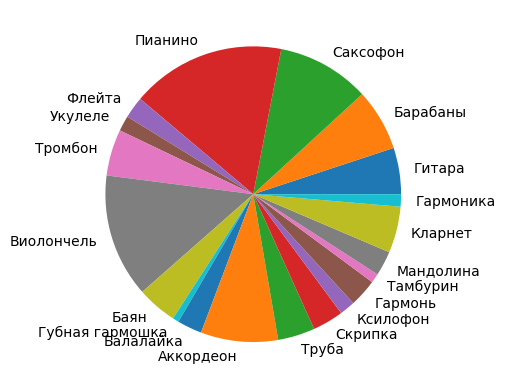

In [48]:
#Круговая диаграмма
import matplotlib.pyplot as plt
labels = []
sizes = []
for i in range(20):
    labels.append(data[i+1][2])
    sizes.append(data[i+1][5])
plt.pie(sizes, labels=labels)
plt.show()